In [183]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = "NanumGothic"
mpl.rc('axes', unicode_minus=False)

In [184]:
sw = pd.read_csv("C:\\Users\\fhdns\\Downloads\\sw.csv", encoding='cp949')

서울교통공사에서 배포한 시간별 지하철 혼잡도 데이터. 결측치값이 없음을 확인.

In [187]:
sw.isnull().sum()

연번        0
조사일자      0
호선        0
역번호       0
역명        0
구분        0
5시30분     0
6시00분     0
6시30분     0
7시00분     0
7시30분     0
8시00분     0
8시30분     0
9시00분     0
9시30분     0
10시00분    0
10시30분    0
11시00분    0
11시30분    0
12시00분    0
12시30분    0
13시00분    0
13시30분    0
14시00분    0
14시30분    0
15시00분    0
15시30분    0
16시00분    0
16시30분    0
17시00분    0
17시30분    0
18시00분    0
18시30분    0
19시00분    0
19시30분    0
20시00분    0
20시30분    0
21시00분    0
21시30분    0
22시00분    0
22시30분    0
23시00분    0
23시30분    0
dtype: int64

사용할 연속형 변수들만 간추린 데이터셋 생성.

In [185]:
sw2 = sw.drop(['연번', '조사일자', '호선', '역번호', '역명', '구분'], axis = 1)

In [186]:
sw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   5시30분   1704 non-null   float64
 1   6시00분   1704 non-null   float64
 2   6시30분   1704 non-null   float64
 3   7시00분   1704 non-null   float64
 4   7시30분   1704 non-null   float64
 5   8시00분   1704 non-null   float64
 6   8시30분   1704 non-null   float64
 7   9시00분   1704 non-null   float64
 8   9시30분   1704 non-null   float64
 9   10시00분  1704 non-null   float64
 10  10시30분  1704 non-null   float64
 11  11시00분  1704 non-null   float64
 12  11시30분  1704 non-null   float64
 13  12시00분  1704 non-null   float64
 14  12시30분  1704 non-null   float64
 15  13시00분  1704 non-null   float64
 16  13시30분  1704 non-null   float64
 17  14시00분  1704 non-null   float64
 18  14시30분  1704 non-null   float64
 19  15시00분  1704 non-null   float64
 20  15시30분  1704 non-null   float64
 21  16시00분  1704 non-null   float64
 22  

IQR방식을 사용, 이상치를 제거함.

In [188]:
quartile_1 = sw2.quantile(0.25)
quartile_3 = sw2.quantile(0.75)
IQR = quartile_3 - quartile_1
condition = (sw2 < (quartile_1 - 1.5 * IQR)) | (sw2 > (quartile_3 + 1.5 * IQR))
condition = condition.any(axis=1)
sw2 = sw2[condition]

각 시간대별 혼잡도의 평균을 구해 본 결과 혼잡도가 가장 낮은 23시 30분과 혼잡도가 가장 높은 18시 30분을 대상으로 분석 진행.

In [189]:
sw2.mean()

5시30분     23.799548
6시00분     22.064253
6시30분     24.199095
7시00분     32.064253
7시30분     41.865385
8시00분     57.891855
8시30분     47.966063
9시00분     42.090950
9시30분     34.747964
10시00분    29.642986
10시30분    28.809502
11시00분    28.749774
11시30분    28.821946
12시00분    29.710633
12시30분    31.164253
13시00분    31.460181
13시30분    31.107919
14시00분    29.801131
14시30분    30.370588
15시00분    32.371493
15시30분    34.255204
16시00분    36.945928
16시30분    39.792081
17시00분    43.405430
17시30분    45.428959
18시00분    51.565158
18시30분    52.052941
19시00분    38.104751
19시30분    29.406561
20시00분    26.315385
20시30분    25.727828
21시00분    27.849095
21시30분    26.254525
22시00분    30.897059
22시30분    29.507240
23시00분    24.907240
23시30분    17.580995
dtype: float64

Kmeans 군집화를 하기 앞서 변수를 정규화시킴.

In [190]:
from sklearn.preprocessing import MinMaxScaler

#혼잡도 평균이 가장 낮은 시간인 23시 30분과 혼잡도 평균이 가장 높은 18시 30분
data = sw2[['18시30분', '23시30분']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

군집의 수 K를 2부터 7까지 바꿔가며 시각화함.
최적의 K를 찾기 위해 실루엣 계수를 시각화시켜 표시.

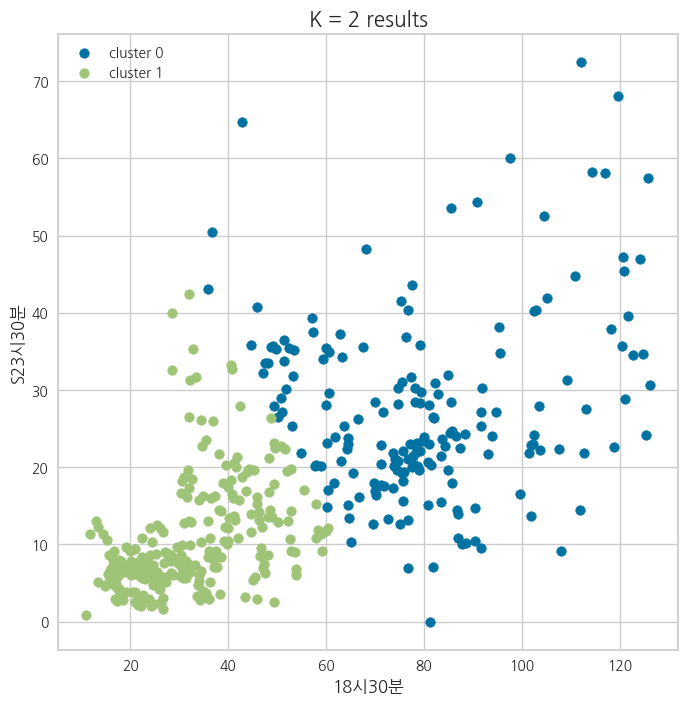

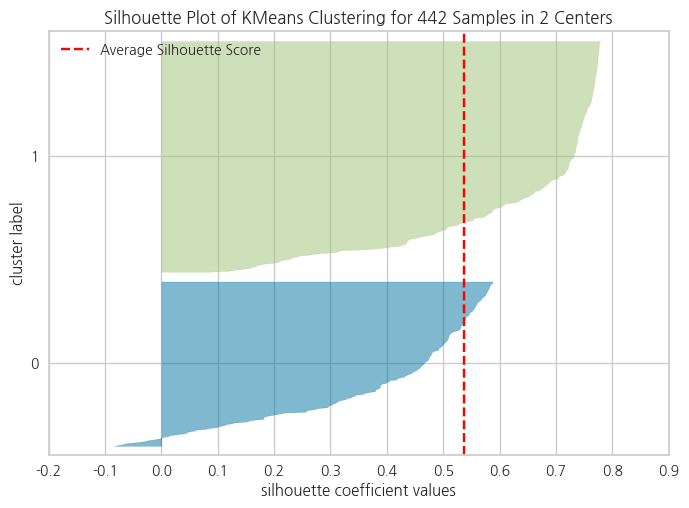

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 442 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [191]:
from sklearn.cluster import KMeans

k = 2

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
sw2['cluster'] = model.fit_predict(data_scale)

import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(sw2.loc[sw2['cluster'] == i, '18시30분'], sw2.loc[sw2['cluster'] == i, '23시30분'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('18시30분', size = 12)
plt.ylabel('S23시30분', size = 12)
plt.show()

from yellowbrick.cluster import SilhouetteVisualizer

#실루엣 계수 시각화
visualizer_2 = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer_2.fit(data_scale)      
visualizer_2.show()

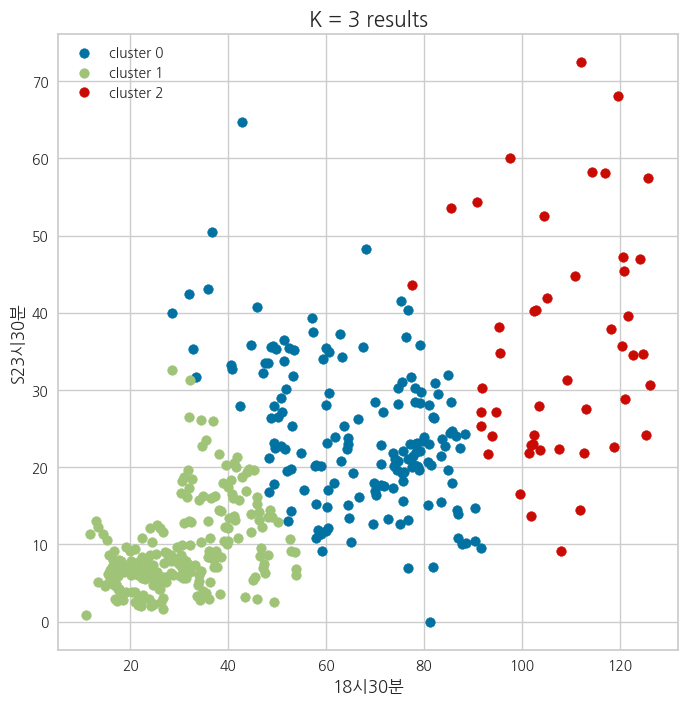

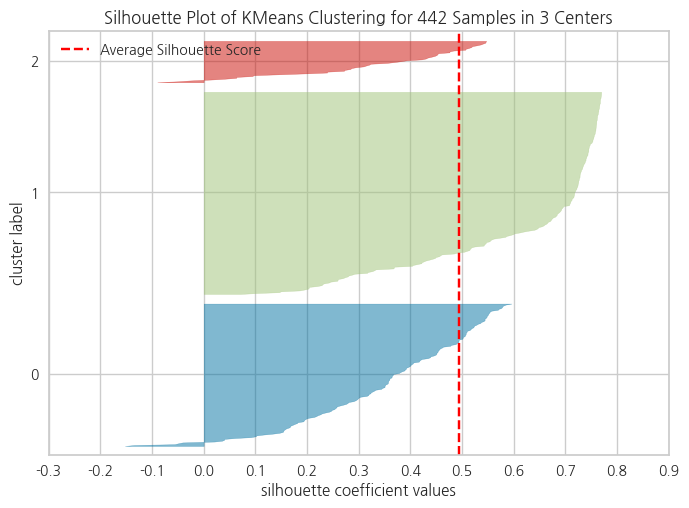

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 442 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [192]:
k = 3

model = KMeans(n_clusters = k, random_state = 10)

model.fit(data_scale)

sw2['cluster'] = model.fit_predict(data_scale)

import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(sw2.loc[sw2['cluster'] == i, '18시30분'], sw2.loc[sw2['cluster'] == i, '23시30분'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('18시30분', size = 12)
plt.ylabel('S23시30분', size = 12)
plt.show()

from yellowbrick.cluster import SilhouetteVisualizer

visualizer_2 = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer_2.fit(data_scale)      
visualizer_2.show()

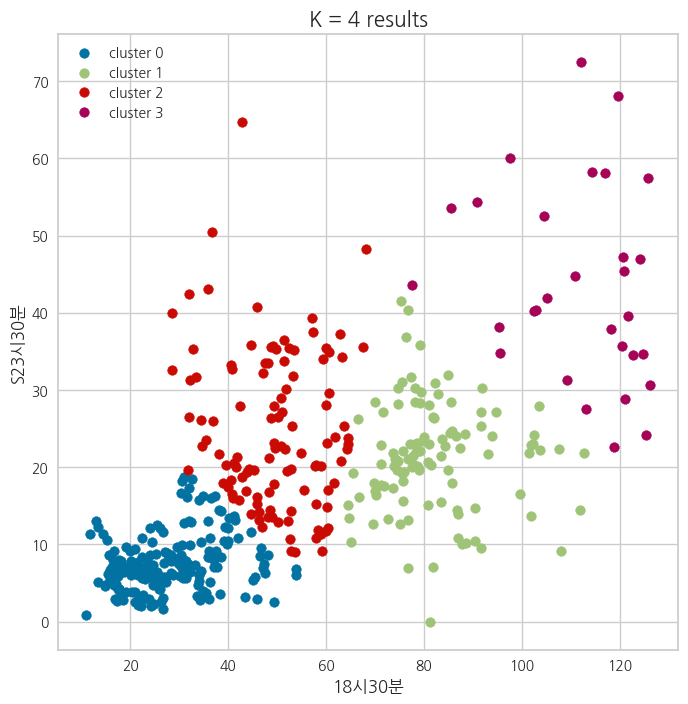

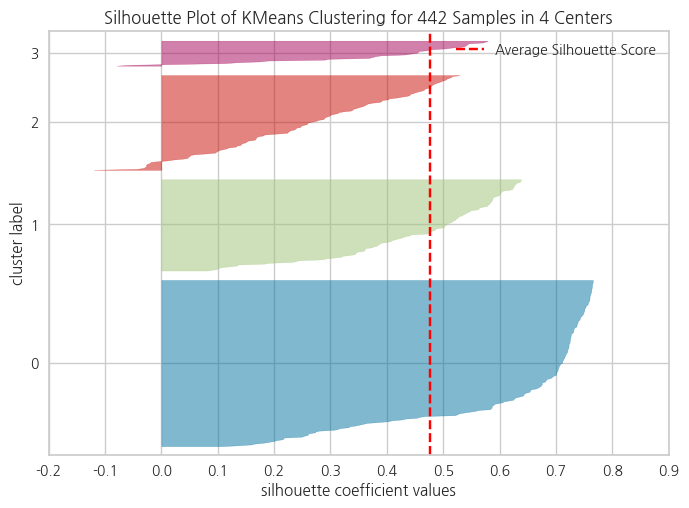

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 442 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [193]:
k = 4

model = KMeans(n_clusters = k, random_state = 10)

model.fit(data_scale)

sw2['cluster'] = model.fit_predict(data_scale)

import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(sw2.loc[sw2['cluster'] == i, '18시30분'], sw2.loc[sw2['cluster'] == i, '23시30분'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('18시30분', size = 12)
plt.ylabel('S23시30분', size = 12)
plt.show()

from yellowbrick.cluster import SilhouetteVisualizer

visualizer_2 = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer_2.fit(data_scale)      
visualizer_2.show()

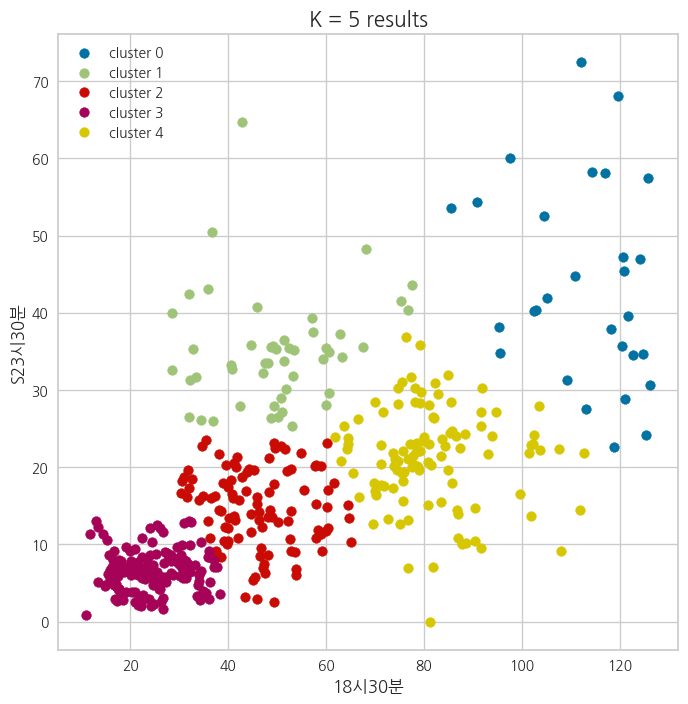

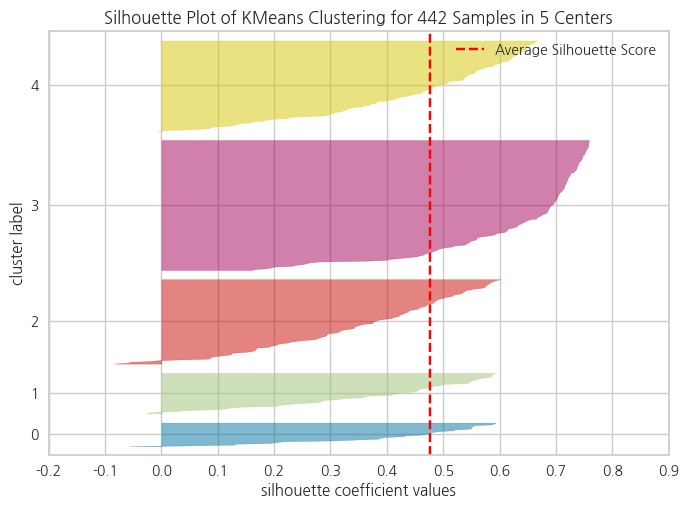

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 442 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [194]:
k = 5

model = KMeans(n_clusters = k, random_state = 10)

model.fit(data_scale)

sw2['cluster'] = model.fit_predict(data_scale)

import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(sw2.loc[sw2['cluster'] == i, '18시30분'], sw2.loc[sw2['cluster'] == i, '23시30분'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('18시30분', size = 12)
plt.ylabel('S23시30분', size = 12)
plt.show()

from yellowbrick.cluster import SilhouetteVisualizer

visualizer_2 = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer_2.fit(data_scale)      
visualizer_2.show()

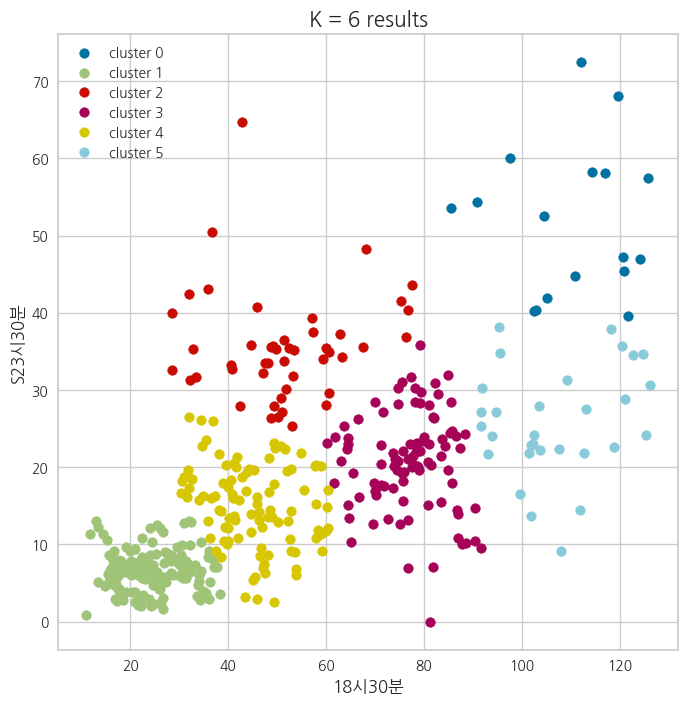

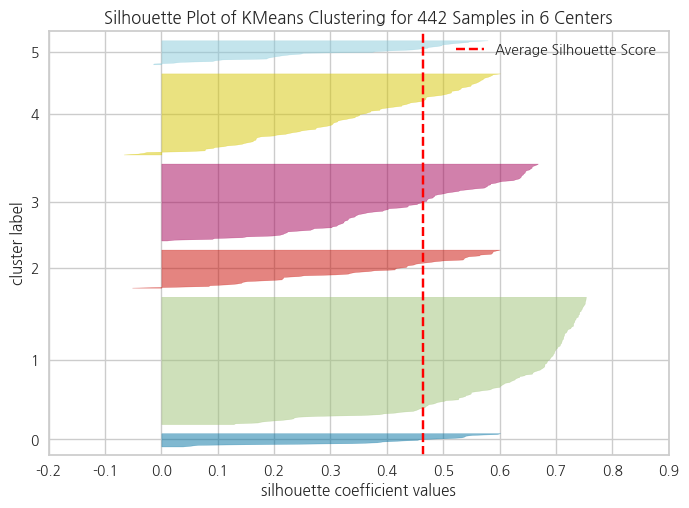

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 442 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [195]:
k = 6

model = KMeans(n_clusters = k, random_state = 10)

model.fit(data_scale)

sw2['cluster'] = model.fit_predict(data_scale)

import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(sw2.loc[sw2['cluster'] == i, '18시30분'], sw2.loc[sw2['cluster'] == i, '23시30분'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('18시30분', size = 12)
plt.ylabel('S23시30분', size = 12)
plt.show()

from yellowbrick.cluster import SilhouetteVisualizer

visualizer_2 = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer_2.fit(data_scale)      
visualizer_2.show()

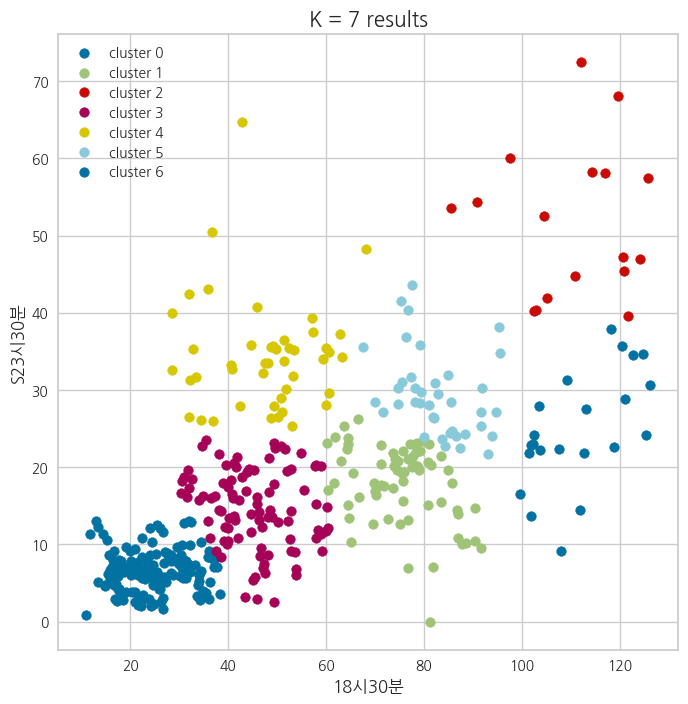

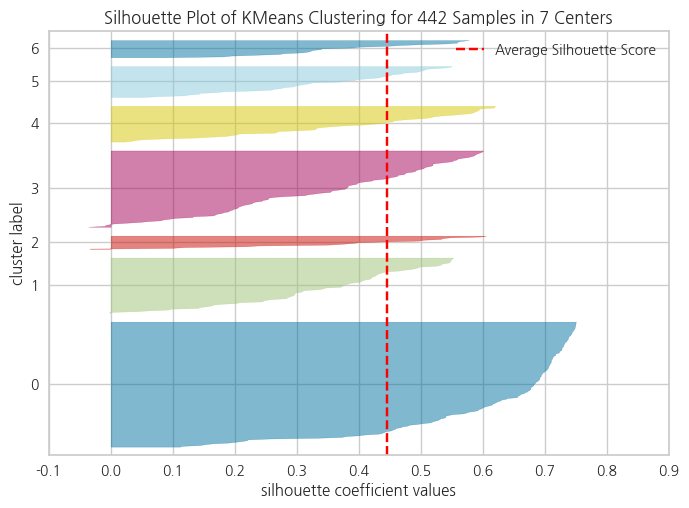

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 442 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [196]:
k = 7

model = KMeans(n_clusters = k, random_state = 10)

model.fit(data_scale)

sw2['cluster'] = model.fit_predict(data_scale)

import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(sw2.loc[sw2['cluster'] == i, '18시30분'], sw2.loc[sw2['cluster'] == i, '23시30분'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('18시30분', size = 12)
plt.ylabel('S23시30분', size = 12)
plt.show()

from yellowbrick.cluster import SilhouetteVisualizer

visualizer_2 = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer_2.fit(data_scale)      
visualizer_2.show()

시각화 자료를 육안으로 보았을 때, 최적의 K는 3~5사이로 보임.

또한 Cluster간의 거리의 합을 나타내는 감소 정도를 K의 갯수에 따라 시각화 시켜본 결과 최적의 K값은 3이라고 보여짐.

D:\rl\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

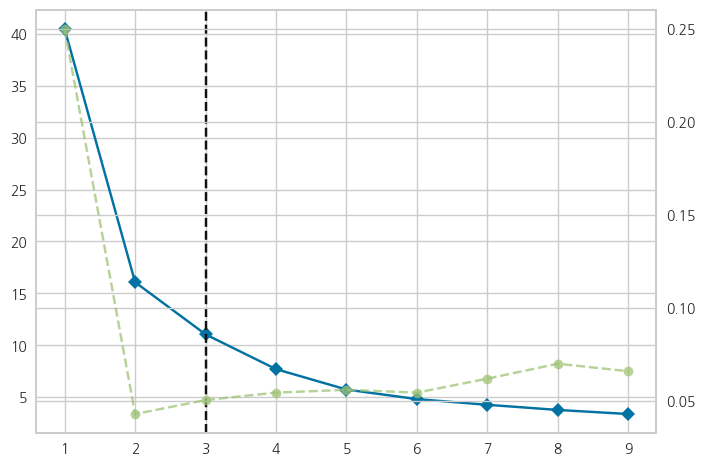

In [197]:
from yellowbrick.cluster import KElbowVisualizer

#elbow method 시각화
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scale)